# Multinomial Naive Bayes Building and Evaluation

This notebook is used for training and evaluation of the single `Multinomial Naive Bayes` models used for this project. To import the trained model and explore its prediction capabilities, skip to the section on error analysis, where this will be done. Before doing that however, ensure that the setup section is run to import the necessary modules.

# Setup

In [2]:
from modules.utils import *
from sklearn.naive_bayes import MultinomialNB

# Model Building and Tuning

In [2]:
# Loading data and
data = SentimentDataset()
tf_idf(data)

Loading data...


Found cached dataset sentiment140 (/Users/krebs/.cache/huggingface/datasets/sentiment140/sentiment140/1.0.0/f81c014152931b776735658d8ae493b181927de002e706c4d5244ecb26376997)



Loading processed dataset from cache...
Dataset loaded
TF-IDF embedding applied


In [5]:
naive_bayes = SklearnModels(model=MultinomialNB(), 
                            data_model=data,
                            model_name='MultinomialNaiveBayes',
                            scale=False)

In [6]:
naive_bayes.fit()

# Evaluate

In [7]:
print(f'{naive_bayes.model_name}')
naive_bayes.evaluate_on_test(accuracy=True)

MultinomialNaiveBayes
Test Accuracy:  0.78865


In [8]:
print(f'{naive_bayes.model_name}')
naive_bayes.evaluate_on_test(accuracy=False, classification_rep=True)

MultinomialNaiveBayes
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     19982
           1       0.80      0.78      0.79     20018

    accuracy                           0.79     40000
   macro avg       0.79      0.79      0.79     40000
weighted avg       0.79      0.79      0.79     40000



<Figure size 720x576 with 0 Axes>

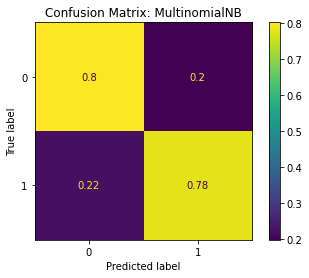

In [10]:
naive_bayes.evaluate_on_test(confusion_mat=True, print_out=False)
naive_bayes.plot_confusion_matrix()

In [31]:
# Save Model
naive_bayes.save()

## Error

In [10]:
from datasets import load_dataset
import random
from tabulate import tabulate

In [4]:
# Loading data and
data = SentimentDataset()
tf_idf(data)

Loading data...


Found cached dataset sentiment140 (/Users/krebs/.cache/huggingface/datasets/sentiment140/sentiment140/1.0.0/f81c014152931b776735658d8ae493b181927de002e706c4d5244ecb26376997)



Loading processed dataset from cache...
Dataset loaded
TF-IDF embedding applied


In [6]:
# Loading new dataset
df = load_dataset('sentiment140')

# Create subset based on new data
test_set = df['train'].to_pandas().groupby('sentiment').apply(
    lambda x: x[-1000:]).reset_index(drop=True).replace(4, 1).sample(frac=1)

# Process it similarly to the training data
sentences = SentimentDataset(
    test_set.text.to_list(), subset='test').process_data()

# Apply tf-idf on it
vectorized = data.tfidf_vectorize(sentences)

# Target list
target = test_set.sentiment.to_list()

Found cached dataset sentiment140 (/Users/krebs/.cache/huggingface/datasets/sentiment140/sentiment140/1.0.0/f81c014152931b776735658d8ae493b181927de002e706c4d5244ecb26376997)


  0%|          | 0/2 [00:00<?, ?it/s]

Processing
Processing test input


In [9]:
# Load model from model directory
model = SklearnModels(model_name='MultinomialNaiveBayes',
                         split=False).load_model()

# Perform predictions
predictions = model.model.predict(vectorized)


Loading model


In [11]:
# Indices of wrong predictions
wrong_predictions = [i for i, (a, b) in enumerate(
    zip(predictions, target)) if a != b]

# Random list of 5 index positions
indexes = [wrong_predictions[random.randint(
    0, len(wrong_predictions)-1)] for _ in range(5)]

# Original tweet
original = test_set.text.to_list()

# Processed tweet
processed = sentences


In [13]:
# Create a table for tabulate
table = [[original[i], processed[i], target[i], predictions[i]]
         for i in indexes]


In [14]:
print('MNB Wrong Predictions - TF-IDF Embedding\n')
print(tabulate(table, headers=["Original Tweet", "Processed Tweet", "True Label", "Predicted Label"]))

MNB Wrong Predictions - TF-IDF Embedding

Original Tweet                                                                                                       Processed Tweet                                                              True Label    Predicted Label
-------------------------------------------------------------------------------------------------------------------  -------------------------------------------------------------------------  ------------  -----------------
Drinks at Cabana.... Only two cheeky ones and feel wobbly                                                            drink cabana two cheeky one feel wobbly                                               0                  1
@brinathemodel Lol I hav yet 2 see ya video cuz I dun hav a cpu onli my sidekick Lx which doesn't let me see videos  lol hav yet 2 see ya video cuz dun hav cpu onli sidekick lx let see video             0                  1
@kileycyrus i HATE you                                        